#### PYT-DS SAISOFT

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/27963484878/in/album-72157693427665102/" title="Barry at Large"><img src="https://farm1.staticflickr.com/969/27963484878_b38f0db42a_m.jpg" width="240" height="180" alt="Barry at Large"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

# DATA SCIENCE WITH PYTHON


[Click here](http://nbviewer.jupyter.org/github/4dsolutions/Python5/blob/master/OverviewNotes_PYTDS_3.ipynb) to view this JN on nbviewer.

In the concluding sessions of this course, I have shifted from talking about the data pipeline, to the functions at the end of the tunnel, our Machine Learning algorithms, which I've also likened to a stable of horses, in terms of how we "race" them to find the best.  Choosing the best horse for your application takes experience.  Don't expect to become a data scientist overnight.

In our sequence below, I start with a famous, oft used dataset, made of 28 by 28 numpy arrays, representing grayscale images of the numerals 0 through 9, quite a few specimens of each.  They're labeled rows.  We know the digits.  Lets take a look.

In [1]:
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [2]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [3]:
import matplotlib.pyplot as plt 
% matplotlib inline

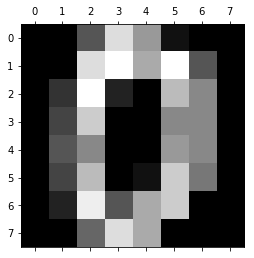

In [4]:
plt.gray()  # gray reversed shown below
_ = plt.matshow(digits.images[0]) 

[Another way](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html).

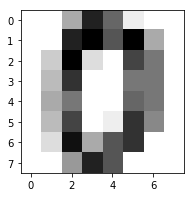

In [5]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

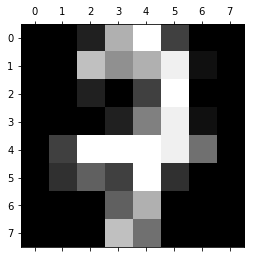

In [6]:
_ = plt.matshow(digits.images[108])

In [7]:
digits.data[108]

array([  0.,   0.,   2.,  11.,  16.,   4.,   0.,   0.,   0.,   0.,  12.,
         9.,  11.,  15.,   1.,   0.,   0.,   0.,   2.,   0.,   4.,  16.,
         0.,   0.,   0.,   0.,   0.,   2.,   8.,  15.,   1.,   0.,   0.,
         4.,  16.,  16.,  16.,  15.,   7.,   0.,   0.,   3.,   6.,   4.,
        16.,   3.,   0.,   0.,   0.,   0.,   0.,   6.,  11.,   0.,   0.,
         0.,   0.,   0.,   0.,  12.,   7.,   0.,   0.,   0.])

Remember how we think in machine learning.  We have a multifaceted (multi-featured) set of samples, rows with many columns, and then a single column of correct results, an "answer key" if you will.  

We often call this answer key column the "target" and then measure "error" as divergence between guesses and target.  

Decreasing divergence bespeaks of a learning rate as the model trains on, or fits the training data.  Whether we control this learning rate as a hyperparameter, or leave it to the algorithm to work at some built-in speed, depends on which machine learner type we've selected.  Below we're looking at [KNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) and then a neural net.

In [8]:
digits.target[108]

7

That's a very poor rendering of the numeral 7 and we're immediately forgiving if our Machine Learning algorithm gets some wrong, with training data of such abysmal quality.  As seen from ```digits.data```, the 64 bits used to represent a digit are hardly enough.  Other datasets come with at least 28 x 28 bits for each numeral.  We're truly at the low end with this skimpy number of bits per digit.

Neverthesless, we press on... I'm making only minor changes to [this open source script on Github](https://gist.github.com/fabiosato/2a2014cd386d475fd037), by [Fabiosato](https://gist.github.com/fabiosato).

Remember how KNN works:  

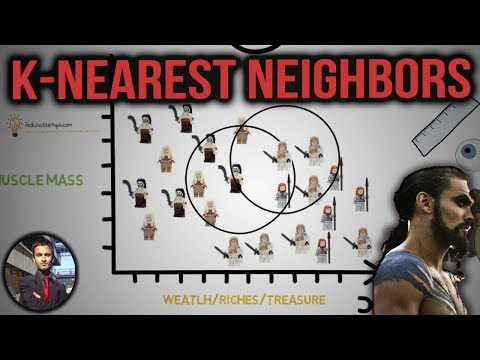

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo("MDniRwXizWo")

Remember to distinguish KNN from K-Means.  You might use the latter to create the clusters whereby you could then fit the former.  Here's [a paper on LinkedIn](https://www.linkedin.com/pulse/classification-clustering-knn-vs-k-means-raymond-rashid/) suggesting doing that.  Once you have the clusters (voters), a new data point is "claimed" by one or more clusters.  

[Hierarchical clustering algorithms](http:github/4dsolutions/Python5/blob/master/OverviewNotes_PYTDS_3.ipynbPYT_DS_Clustering.ipynb) compete with K-Means.  The latter does better for spherical or globular clusters.

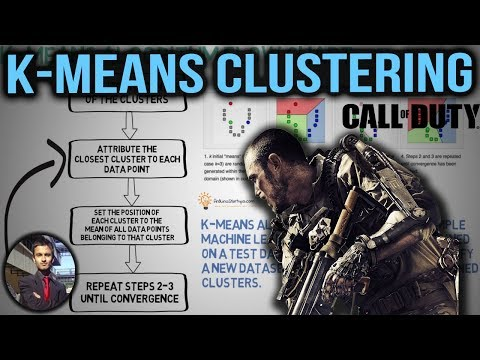

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo("3vHqmPF4VBA")

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import neighbors # http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

# prepare datasets from training and for validation
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, 
                                                    test_size=0.4, random_state=0)

# runs the kNN classifier for even number of neighbors from 1 to 10
for n in range(1, 10, 2):
        clf = neighbors.KNeighborsClassifier(n)

        # instance based learning
        clf.fit(X_train, y_train)

        # our 'ground truth'
        y_true = y_test

        # predict
        y_pred = clf.predict(X_test)

        # learning metrics
        cm = confusion_matrix(y_true, y_pred)
        acc = accuracy_score(y_true, y_pred)

        print ("Neighbors: %d" % n)
        print ("Confusion Matrix")
        print (cm)

        print ("Accuracy score: %f" % accuracy_score(y_true, y_pred))
        print ()

Neighbors: 1
Confusion Matrix
[[60  0  0  0  0  0  0  0  0  0]
 [ 0 73  0  0  0  0  0  0  0  0]
 [ 0  0 71  0  0  0  0  0  0  0]
 [ 0  0  0 70  0  0  0  0  0  0]
 [ 0  0  0  0 63  0  0  0  0  0]
 [ 0  0  0  0  0 87  1  0  0  1]
 [ 0  0  0  0  0  0 76  0  0  0]
 [ 0  0  0  0  0  0  0 65  0  0]
 [ 0  2  0  1  0  0  0  0 74  1]
 [ 0  0  0  2  0  1  0  0  0 71]]
Accuracy score: 0.987483

Neighbors: 3
Confusion Matrix
[[60  0  0  0  0  0  0  0  0  0]
 [ 0 73  0  0  0  0  0  0  0  0]
 [ 0  0 71  0  0  0  0  0  0  0]
 [ 0  0  1 69  0  0  0  0  0  0]
 [ 0  0  0  0 62  0  0  1  0  0]
 [ 0  1  0  0  0 86  1  0  0  1]
 [ 0  0  0  0  0  0 76  0  0  0]
 [ 0  0  0  0  0  0  0 65  0  0]
 [ 0  2  0  2  0  0  0  0 73  1]
 [ 0  0  0  1  0  0  0  0  0 73]]
Accuracy score: 0.984701

Neighbors: 5
Confusion Matrix
[[60  0  0  0  0  0  0  0  0  0]
 [ 0 73  0  0  0  0  0  0  0  0]
 [ 0  0 70  0  0  0  0  1  0  0]
 [ 0  0  1 69  0  0  0  0  0  0]
 [ 0  0  0  0 62  0  0  1  0  0]
 [ 0  0  0  0  0 87  1  0  0  1

Discerning digits within a blizzard of data points streaming in, or other patterns, may be described as a process of identifying clusters or [neighborhoods](http://scikit-learn.org/stable/modules/neighbors.html).  Even before we name the clusters we claim to find, we need to find them, and this is where dimensionality reduction comes in handy, as if we can get the dimensions down to three, we have some axes we might use.

"Dimensionality reduction" involves finding eigenvectors, the most efficient at singling out cells in not containing redundant info, forming a basis.  An idea of ranking eigenvectors, in the sense of "most significant digits", allows us to cluster data by just the first few eigenvector coordinates.

One might usefully compare this process to discovering the desmomap, or binary tree resulting from bottom-up progressive agglomeration into larger groups.  One may then place a threshold cut through the data to vary the number of clusters one wishes to regard as separate.  There's a sense of binning and/or pigeon-holing, where the hyperparameter is the degree of subdivisioning.

Does a [neural network](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) fare better?  Let's admit, the KNN machine learner did a great job.  Fast horse!

In [12]:
from sklearn.neural_network import MLPClassifier

# runs the MLP classifier for even number of neighbors from 1 to 10
for n in range(1, 10, 2):
        clf = MLPClassifier()

        # instance based learning
        clf.fit(X_train, y_train)

        # our 'ground truth'
        y_true = y_test

        # predict
        y_pred = clf.predict(X_test)

        # learning metrics
        cm = confusion_matrix(y_true, y_pred)
        acc = accuracy_score(y_true, y_pred)

        print ("Neighbors: %d" % n)
        print ("Confusion Matrix")
        print (cm)

        print ("Accuracy score: %f" % accuracy_score(y_true, y_pred))
        print ()

Neighbors: 1
Confusion Matrix
[[60  0  0  0  0  0  0  0  0  0]
 [ 0 72  0  0  0  1  0  0  0  0]
 [ 0  3 67  0  0  0  0  0  1  0]
 [ 0  0  1 69  0  0  0  0  0  0]
 [ 0  0  0  0 62  0  0  1  0  0]
 [ 0  0  0  1  0 86  1  0  0  1]
 [ 0  1  0  0  0  1 74  0  0  0]
 [ 0  0  0  0  0  0  0 65  0  0]
 [ 0  4  1  0  0  1  0  0 69  3]
 [ 0  0  0  2  0  1  0  1  1 69]]
Accuracy score: 0.963839

Neighbors: 3
Confusion Matrix
[[60  0  0  0  0  0  0  0  0  0]
 [ 0 71  0  0  0  0  0  0  2  0]
 [ 0  0 70  0  0  0  0  0  1  0]
 [ 0  0  0 68  0  1  0  0  1  0]
 [ 0  0  0  0 62  0  0  1  0  0]
 [ 0  0  0  0  0 85  2  0  0  2]
 [ 1  1  0  0  0  0 74  0  0  0]
 [ 0  0  0  0  2  0  0 63  0  0]
 [ 0  1  0  0  0  1  0  0 75  1]
 [ 1  1  1  0  0  1  0  1  0 69]]
Accuracy score: 0.969402

Neighbors: 5
Confusion Matrix
[[60  0  0  0  0  0  0  0  0  0]
 [ 0 72  0  0  0  0  0  0  1  0]
 [ 0  0 68  0  0  0  0  3  0  0]
 [ 0  0  0 69  0  1  0  0  0  0]
 [ 0  0  0  0 63  0  0  0  0  0]
 [ 0  1  0  1  0 86  1  0  0  0

I'd say these two are competitive, but award KNN first prize in this case.